In [29]:
from pathlib import Path

output_folder = Path("./data/")
assert output_folder.exists()
output_path = output_folder / ("spectra_plot")
number_of_images = 273
number_of_panels = 3
bands = [2, 4]
number_of_bands = len(bands)

In [54]:
from reflectdetect.constants import COMPRESSION_FACTOR
import pandas as pd

# Load CSV file
file_path = 'data/examplespectra_reflectdetect.csv'  # Replace with your actual CSV file path
data = pd.read_csv(file_path)

# Separate bands for input1 and input2
refdet_bands = data[
    ["IMG_0196_1_reflectance_1", "IMG_0196_1_reflectance_2", "IMG_0196_1_reflectance_4", "IMG_0196_1_reflectance_5",
     "IMG_0196_1_reflectance_6", ]]
metacal_bands = data[["20240909_week8_orthomosaic_metacali_1", "20240909_week8_orthomosaic_metacali_2",
                      "20240909_week8_orthomosaic_metacali_3", "20240909_week8_orthomosaic_metacali_4",
                      "20240909_week8_orthomosaic_metacali_5"
                      ]]

refdet_bands = refdet_bands / COMPRESSION_FACTOR

# Calculate mean and standard deviation for each band
refdet_means = refdet_bands.mean(axis=0)
refdet_std = refdet_bands.std(axis=0)
metacal_means = metacal_bands.mean(axis=0)
metacal_std = metacal_bands.std(axis=0)

# Create x-axis labels for the bands
labels = ['Blue', 'Green', 'Red', 'Red edge', 'NIR']
print(refdet_bands)

    IMG_0196_1_reflectance_1  IMG_0196_1_reflectance_2  \
0                        NaN                    0.0407   
1                     0.0194                    0.0873   
2                        NaN                    0.0231   
3                     0.0979                    0.1863   
4                     0.0216                    0.0963   
..                       ...                       ...   
95                    0.0238                    0.1080   
96                       NaN                    0.0508   
97                    0.0026                    0.0674   
98                    0.0331                    0.0953   
99                    0.0025                    0.0374   

    IMG_0196_1_reflectance_4  IMG_0196_1_reflectance_5  \
0                        NaN                    0.1216   
1                     0.0034                    0.1868   
2                        NaN                    0.1008   
3                     0.1153                    0.3192   
4            

In [55]:
from matplotlib import pyplot as plt

plt.style.use('science')
plt.rcParams.update({'font.size': 28})

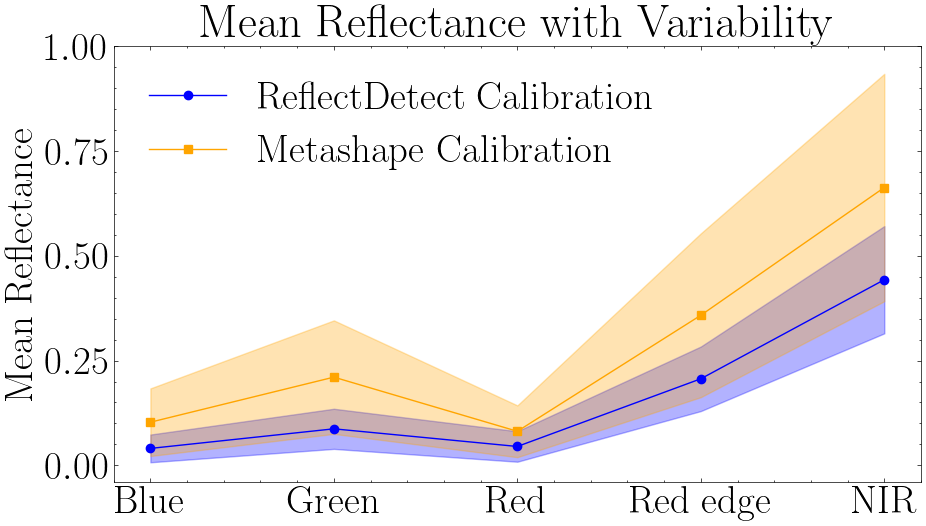

In [74]:
# Create a plot
plt.figure(figsize=(10, 6))

# Plot refdet (Reflect Detect) data with shaded error region
x1 = range(len(refdet_means))
plt.plot(x1, refdet_means, '-o', label='ReflectDetect Calibration', color='blue')
plt.fill_between(x1, refdet_means - refdet_std, refdet_means + refdet_std, color='blue', alpha=0.3)

# Plot metacal (Metashape Calibration) data with shaded error region
x2 = range(len(metacal_means))
plt.plot(x2, metacal_means, '-s', label='Metashape Calibration', color='orange')
plt.fill_between(x2, metacal_means - metacal_std, metacal_means + metacal_std, color='orange', alpha=0.3)

# Customize the plot
plt.xticks(range(len(labels)), labels)
plt.ylabel('Mean Reflectance')
plt.yticks([0, 0.25, 0.50, 0.75, 1])
plt.title('Mean Reflectance with Variability')
plt.legend()
# Adjust layout and save the plot
plt.tight_layout()
plt.savefig(output_path.as_posix() + ".jpg", dpi=300)
plt.show()